## Reusable Ice Cream Container: Inputs


- **Potential assumption:** *All customers are forced switching to the reusable option*
- **Potential assumption:** *The amount of customers switching to the reusable option is known*

#### Reusable
Container weight: 470 g\
CO2 from primary production and processing: 2.95 kg/kg\
CO2 from use related activities: 0.022 kg/cycle\
Embodied energy from primary production and processing: 55.1 MJ/kg\
Energy consumption from use related activities: 0.34 MJ/cycle

#### Single Use Biodegradable
Container weight: 170 g\
CO2 from primary production and processing: 0.13 kg/kg\
Embodied energy from primary production and processing: 2.81 MJ/kg

#### EPS Reference
Container weight: 37 g\
CO2 from primary production and processing: 4.05 kg/kg\
Embodied energy from primary production and processing: 108.80 MJ/kg


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

containerAmountS1 = 15209.0
containerAmountS2 = 29412.0
containerAmountS3 = 40000.0

containerWeight = 0.188

co2Production = 2.95 * containerWeight
co2Use = 0.022

embodiedEnergy = 55.1 * containerWeight
energyUse = 0.34

## Scenario 1: Good Behaviour
<div>
<img src="reuseS1.png" width="500"/>
</div>

<font size="3">The transition probabilities for moving between states in 'Scenario 1: Good behaviour' is summarized in a probability trasistion matrix. The 'Good Behaviour' represented by this system is characterized by being likely to transit from states; **b** --> **c** and **c** --> **a**, thus being unlikely to become disposed (d) or forgotten (e). For the above system, the initial distribution of containers between states [a, b, c, d, e] is divided as follows:</font>




$$initialDistribution\ =\begin{bmatrix} 1.0 & 0.0 & 0.0 & 0.0 & 0.0\end{bmatrix}$$
<br>


$$transitionProbabilities\ =\begin{bmatrix} 0.0 & 0.95 & 0.00 & 0.05 & 0.0 \\ 0.0 & 0.00 & 0.95 & 0.05 & 0.0 \\ 0.8 & 0.00 & 0.00 & 0.10 & 0.1 \\ 0.0 & 0.00 & 0.00 & 1.00 & 0.0 \\ 0.2 & 0.00 & 0.00 & 0.50 & 0.3\end{bmatrix}$$  

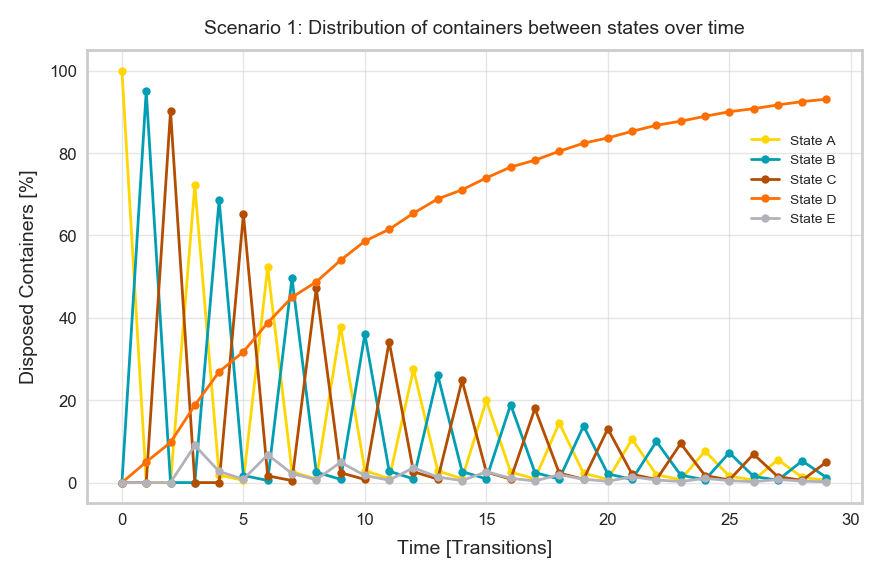

In [14]:
#The initial distribution of container and the propability transition matrix is set
initialDist = np.array([1.0, 0.0, 0.0, 0.0, 0.0])
distHistory = initialDist
transMatrixOne = np.array([[0.0, 0.95, 0.00, 0.05, 0.0], 
                        [0.0, 0.00, 0.95, 0.05, 0.0],
                        [0.8, 0.00, 0.00, 0.10, 0.1],
                        [0.0, 0.00, 0.00, 1.00, 0.0], 
                        [0.2, 0.00, 0.00, 0.50, 0.3]])
currentDist = initialDist

#The initial distribution containers is multiplied with the transistion matrix and upadated 30 times
#The distribution of containers after each cycle is logged
for x in range (1,30):
    currentDist = np.matmul(currentDist,transMatrixOne)
    distHistory = np.vstack([distHistory,currentDist])

#print("Distribution history =")
#print(distHistory)

#The container distribution history is plotted for each state
plt.figure(figsize = (5,3), dpi=200)

x = np.linspace(0.0, 29, 30)
yaSone = distHistory[ : , 0]
ybSone = distHistory[ : , 1]
ycSone = distHistory[ : , 2]
ydSone = distHistory[ : , 3]
yeSone = distHistory[ : , 4]

plt.plot(x, yaSone * 100, label = 'State A', color = '#FFD600', marker = '.', linewidth = '1', markersize = '4')
plt.plot(x, ybSone * 100, label = 'State B', color = '#009EB3', marker = '.', linewidth = '1', markersize = '4')
plt.plot(x, ycSone * 100, label = 'State C', color = '#B34D00', marker = '.', linewidth = '1', markersize = '4')
plt.plot(x, ydSone * 100, label = 'State D', color = '#FF6E00', marker = '.', linewidth = '1', markersize = '4')
plt.plot(x, yeSone * 100, label = 'State E', color = '#B3B1BA', marker = '.', linewidth = '1', markersize = '4')

#Visual plot settings
plt.legend(loc = (0.85, 0.6), fontsize = '5')
plt.title('Scenario 1: Distribution of containers between states over time', fontsize = '7')
plt.xlabel('Time [Transitions]', fontsize = '7')
plt.ylabel('Disposed Containers [%]', fontsize = '7')
plt.xticks(fontsize = '6')
plt.yticks(fontsize = '6')
plt.grid(zorder = 0, alpha = 0.5, linewidth = 0.5)

plt.show()

## Scenario 2: Medium behaviour
<div>
<img src="reuseS2.png" width="500"/>
</div>

<font size="3">The transition probabilities for moving between states in 'Scenario 2: Medium Behaviour' is summarized in a probability trasistion matrix. The 'Medium Behaviour' represented by this system is characterized by being slightly less likely to transit from states; **b** --> **c** and **c** --> **a** compared with scanrio 1, and is thus expected to generate more transistions to state disposed (d) or forgotten (e). For the above system, the initial distribution of containers between states [a, b, c, d, e] is divided as follows:</font>


$$initialDistribution\ =\begin{bmatrix} 1.0 & 0.0 & 0.0 & 0.0 & 0.0\end{bmatrix}$$
<br>


$$transitionProbabilities\ =\begin{bmatrix} 0.0 & 0.95 & 0.00 & 0.05 & 0.0 \\ 0.0 & 0.00 & 0.80 & 0.20 & 0.0 \\ 0.6 & 0.00 & 0.00 & 0.15 & 0.25 \\ 0.0 & 0.00 & 0.00 & 1.00 & 0.0  \\ 0.2 & 0.00 & 0.00 & 0.50 & 0.3 \end{bmatrix}$$  

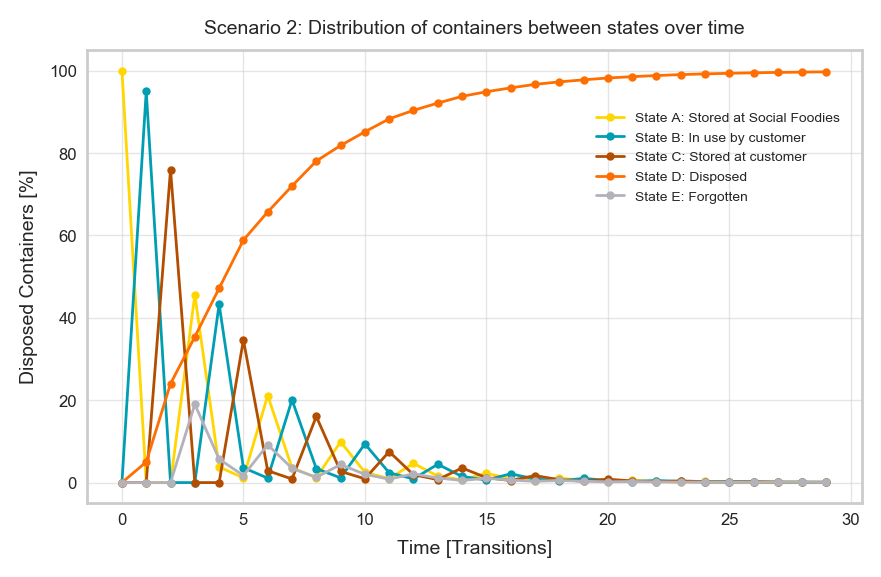

In [15]:
#The initial distribution of container and the propability transition matrix is set
initialDist = np.array([1.0, 0.0, 0.0, 0.0, 0.0])
distHistory = initialDist
transMatrix2 = np.array([[0.0, 0.95, 0.00, 0.05, 0.0], 
                        [0.0, 0.00, 0.80, 0.20, 0.0],
                        [0.6, 0.00, 0.00, 0.15, 0.25],
                        [0.0, 0.00, 0.00, 1.00, 0.0], 
                        [0.2, 0.00, 0.00, 0.50, 0.3]])
currentDist = initialDist

#The initial distribution containers is multiplied with the transistion matrix and upadated 30 times
#The distribution of containers after each cycle is logged
for x in range (1,30):
    currentDist = np.matmul(currentDist,transMatrix2)
    distHistory = np.vstack([distHistory,currentDist])

#The container distribution history is plotted for each state 
plt.figure(figsize = (5,3), dpi=200)

x = np.linspace(0.0, 29, 30)
yaStwo = distHistory[ : , 0]
ybStwo = distHistory[ : , 1]
ycStwo = distHistory[ : , 2]
ydStwo = distHistory[ : , 3]
yeStwo = distHistory[ : , 4]

plt.plot(x, yaStwo * 100, label = 'State A: Stored at Social Foodies', color = '#FFD600', linewidth = '1', marker = '.', markersize = '4')
plt.plot(x, ybStwo * 100, label = 'State B: In use by customer', color = '#009EB3', linewidth = '1', marker = '.', markersize = '4')
plt.plot(x, ycStwo * 100, label = 'State C: Stored at customer', color = '#B34D00', linewidth = '1', marker = '.', markersize = '4')
plt.plot(x, ydStwo * 100, label = 'State D: Disposed', color = '#FF6E00', linewidth = '1', marker = '.', markersize = '4')
plt.plot(x, yeStwo * 100, label = 'State E: Forgotten', color = '#B3B1BA', linewidth = '1', marker = '.', markersize = '4')

#Visual plot settings
plt.legend(loc = (0.65, 0.65), fontsize = '5')
plt.title('Scenario 2: Distribution of containers between states over time', fontsize = '7')
plt.xlabel('Time [Transitions]', fontsize = '7')
plt.ylabel('Disposed Containers [%]', fontsize = '7')
plt.xticks(fontsize = '6')
plt.yticks(fontsize = '6')
plt.grid(zorder = 0, alpha = 0.5, linewidth = 0.5)

plt.show()

## Scenario 3: Bad behaviour
<div>
<img src="reuseS3.png" width="500"/>
</div>

<font size="3">The transition probabilities for moving between states in 'Scenario 3: Bad Behaviour' is summarized in a probability trasistion matrix. The 'Bad Behaviour' represented by this system is characterized by being unlikely likely to transit from states; **b** --> **c** and **c** --> **a** compared with scanrio 1 and 2, and is thus expected to generate the most transistions to state disposed (d) and forgotten (e). For the above system, the initial distribution of containers between states [a, b, c, d, e] is divided as follows:</font>


$$initialDistribution\ =\begin{bmatrix} 1.0 & 0.0 & 0.0 & 0.0 & 0.0\end{bmatrix}$$
<br>


$$transitionProbabilities\ =\begin{bmatrix} 0.0 & 0.95 & 0.00 & 0.05 & 0.0 \\ 0.0 & 0.00 & 0.50 & 0.50 & 0.0 \\ 0.3 & 0.00 & 0.00 & 0.30 & 0.4 \\ 0.0 & 0.00 & 0.00 & 1.00 & 0.0  \\ 0.2 & 0.00 & 0.00 & 0.50 & 0.3 \end{bmatrix}$$  

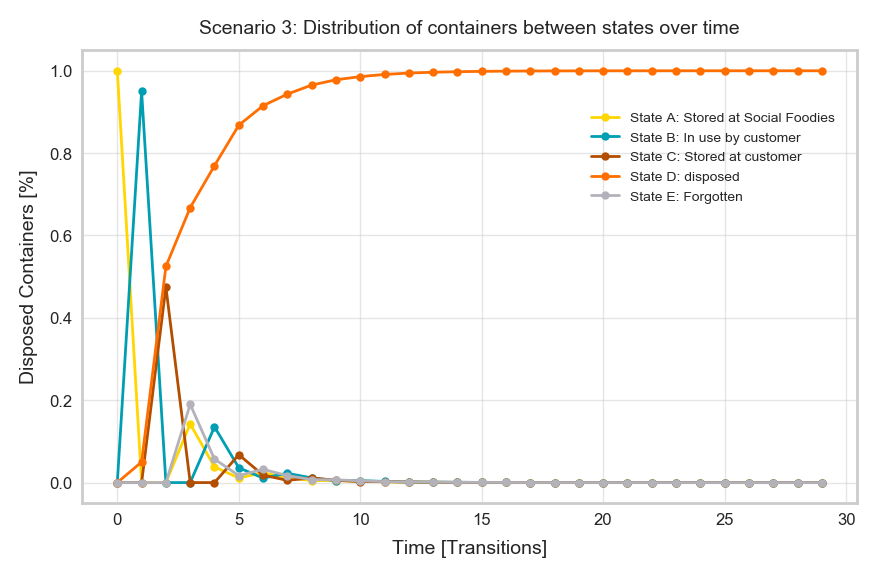

In [16]:
#The initial distribution of container and the propability transition matrix is set
initialDist = np.array([1.0, 0.0, 0.0, 0.0, 0.0])
distHistory = initialDist
transMatrix3 = np.array([[0.0, 0.95, 0.00, 0.05, 0.0], 
                        [0.0, 0.00, 0.50, 0.50, 0.0],
                        [0.3, 0.00, 0.00, 0.30, 0.4],
                        [0.0, 0.00, 0.00, 1.00, 0.0], 
                        [0.2, 0.00, 0.00, 0.50, 0.3]])
currentDist = initialDist

#The initial distribution containers is multiplied with the transistion matrix and upadated 30 times
#The distribution of containers after each cycle is logged
for x in range (1,30):
    currentDist = np.matmul(currentDist,transMatrix3)
    distHistory = np.vstack([distHistory,currentDist])

#The container distribution history is plotted for each state 
plt.figure(figsize = (5,3), dpi=200)

x = np.linspace(0.0, 29, 30)
yaSthree = distHistory[ : , 0]
ybSthree = distHistory[ : , 1]
ycSthree = distHistory[ : , 2]
ydSthree = distHistory[ : , 3]
yeSthree = distHistory[ : , 4]

plt.plot(x, yaSthree, label = 'State A: Stored at Social Foodies', color = '#FFD600', linewidth = '1', marker = '.', markersize = '4')
plt.plot(x, ybSthree, label = 'State B: In use by customer', color = '#009EB3', linewidth = '1', marker = '.', markersize = '4')
plt.plot(x, ycSthree, label = 'State C: Stored at customer', color = '#B34D00', linewidth = '1', marker = '.', markersize = '4')
plt.plot(x, ydSthree, label = 'State D: disposed', color = '#FF6E00', linewidth = '1', marker = '.', markersize = '4')
plt.plot(x, yeSthree, label = 'State E: Forgotten', color = '#B3B1BA', linewidth = '1', marker = '.', markersize = '4')

#Visual plot settings
plt.legend(loc = (0.65, 0.65), fontsize = '5')
plt.title('Scenario 3: Distribution of containers between states over time', fontsize = '7')
plt.xlabel('Time [Transitions]', fontsize = '7')
plt.ylabel('Disposed Containers [%]', fontsize = '7')
plt.xticks(fontsize = '6')
plt.yticks(fontsize = '6')
plt.grid(zorder = 0, alpha = 0.5, linewidth = 0.5)

plt.show()

## Analysis: Average number of transitions
This section cumputes the average number of transitions it takes a container to go from any non-absorbing states (State A, B, C, E) to the absorbing state (State D) of being disposed. 

Average Transitions:
[[ 4.80600396 11.82101388 11.39054092 10.9374115 ]
 [ 3.168028    6.08809802  5.35589265  5.44486581]
 [ 2.38772788  3.35704758  2.48110271  2.96220542]]


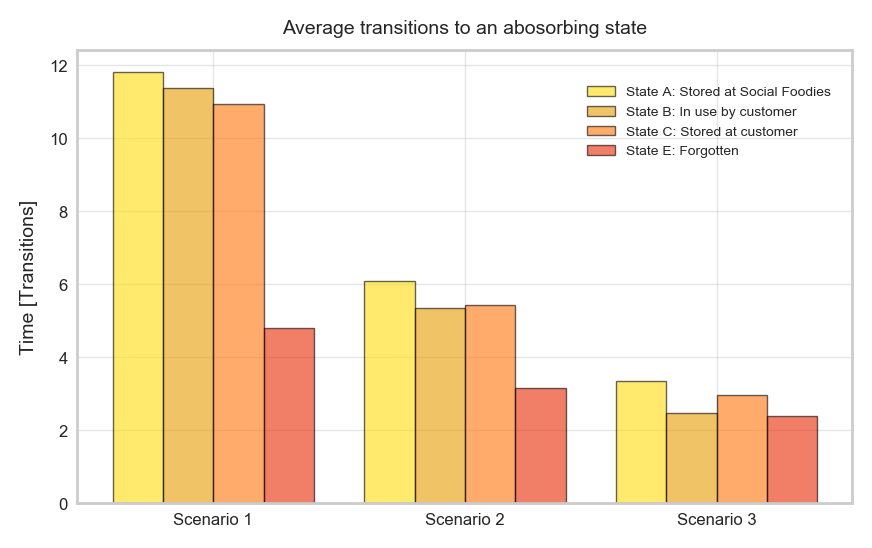

In [17]:
#SCENARIO 1
index1 = np.where(transMatrixOne == 1.0)
stdForm1 = transMatrixOne
stdForm1 = np.roll(stdForm1, - index1[0], axis=1)
stdForm1 = np.roll(stdForm1, - index1[1], axis = 0)
#print('Transition matrix in standard form:')
#print(stdForm)

#The matrix 'q' is found by the row an collumn containing the absorbing state
q1 = stdForm1
q1 = np.delete(q1, 0, axis = 0)
q1 = np.delete(q1, 0, axis = 1)
#print('Matrix q trimmed away from the standard form:')
#print(q)

#A identity matrix of equal shape of 'q' is created
identity1 = np.identity(len(q1[1]))
#print('The identity matrix of corresponding size of q:')
#print(identity)

#The inverse of 'q' minus the identity matrix if calculated in order to find the fundamental matrix
fundamentalOne = np.linalg.inv(np.subtract(identity1, q1))
#rowLabels = np.array([['e'], ['a'], ['b'], ['c']])
#print('Fundamental matrix for Scenario 1:')
#print(fundamentalOne)
#print('With rows representing the states:')
#print(rowLabels)
avgTrans1 = np.sum(fundamentalOne, axis = 1)

#SCENARIO 2
index2 = np.where(transMatrix2 == 1.0)
stdForm2 = transMatrix2
stdForm2 = np.roll(stdForm2, - index2[0], axis=1)
stdForm2 = np.roll(stdForm2, - index2[1], axis = 0)

#The matrix 'q' is found by the row an collumn containing the absorbing state
q2 = stdForm2
q2 = np.delete(q2, 0, axis = 0)
q2 = np.delete(q2, 0, axis = 1)

#A identity matrix of equal shape of 'q' is created
identity2 = np.identity(len(q2[1]))

#The inverse of 'q' minus the identity matrix if calculated in order to find the fundamental matrix
fundamentalTwo = np.linalg.inv(np.subtract(identity2, q2))
avgTrans2 = np.sum(fundamentalTwo, axis = 1)

#SCENARIO 3
index3 = np.where(transMatrix3 == 1.0)
stdForm3 = transMatrix3
stdForm3 = np.roll(stdForm3, - index3[0], axis=1)
stdForm3 = np.roll(stdForm3, - index3[1], axis = 0)

#The matrix 'q' is found by the row an collumn containing the absorbing state
q3 = stdForm3
q3 = np.delete(q3, 0, axis = 0)
q3 = np.delete(q3, 0, axis = 1)

#A identity matrix of equal shape of 'q' is created
identity3 = np.identity(len(q3[1]))

#The inverse of 'q' minus the identity matrix if calculated in order to find the fundamental matrix
fundamentalThree = np.linalg.inv(np.subtract(identity3, q3))
avgTrans3 = np.sum(fundamentalThree, axis = 1)


#PLOT
plt.figure(figsize = (5,3), dpi=200)

avgTransitions = np.vstack([avgTrans1, avgTrans2, avgTrans3])
print('Average Transitions:')
print(avgTransitions)

stateA = avgTransitions[ : , 1]
stateB = avgTransitions[ : , 2]
stateC = avgTransitions[ : , 3]
stateE = avgTransitions[ : , 0]
x = np.arange(len(stateA))

barWidth = 0.20
plt.bar(x, stateA, width = barWidth, color = '#FFDC0D', label ='State A: Stored at Social Foodies', edgecolor = 'black', linewidth = '0.5', alpha = 0.6)
plt.bar(x + barWidth, stateB, width = barWidth, color = '#E89B02', label = 'State B: In use by customer', edgecolor = 'black', linewidth = '0.5', alpha = 0.6)
plt.bar(x + barWidth * 2, stateC, width = barWidth, color = '#FF740A', label = 'State C: Stored at customer', edgecolor = 'black', linewidth = '0.5', alpha = 0.6)
plt.bar(x + barWidth * 3, stateE, width = barWidth, color = '#E82802', label = 'State E: Forgotten', edgecolor = 'black', linewidth = '0.5', alpha = 0.6)

plt.legend(loc = (0.65, 0.75), fontsize = '5')
plt.title('Average transitions to an abosorbing state', fontsize = '7')
plt.xticks(x + barWidth * 1.5, ['Scenario 1', 'Scenario 2', 'Scenario 3'])
plt.ylabel('Time [Transitions]', fontsize = '7')
plt.xticks(fontsize = '6')
plt.yticks(fontsize = '6')
plt.grid(zorder = 0, alpha = 0.5, linewidth = 0.5)

plt.show()

## Analysis: Comparison of disposed containers between scenarios

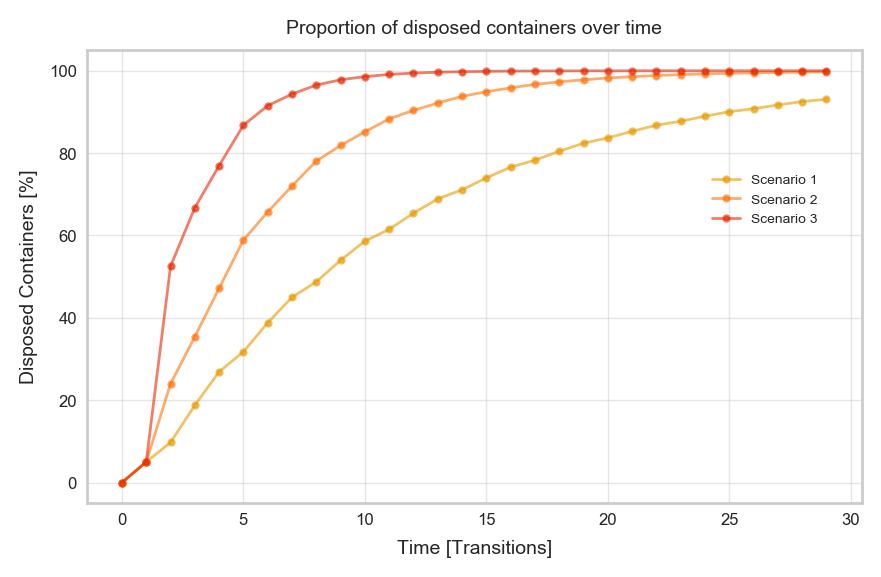

In [18]:
plt.figure(figsize = (5,3), dpi=200)

x = np.linspace(0.0, 29, 30)
plt.plot(x, ydSone * 100, label = 'Scenario 1', color = '#E89B02', linewidth = '1',  marker = '.', markersize = '4', alpha = 0.6)
plt.plot(x, ydStwo * 100, label = 'Scenario 2', color = '#FF740A', linewidth = '1',  marker = '.', markersize = '4', alpha = 0.6)
plt.plot(x, ydSthree * 100, label = 'Scenario 3', color = '#E82802', linewidth = '1', marker = '.', markersize = '4', alpha = 0.6)


plt.title('Proportion of disposed containers over time', fontsize = '7')
plt.xlabel('Time [Transitions]', fontsize = '7')
plt.ylabel('Disposed Containers [%]', fontsize = '7')
plt.legend(loc = (0.8, 0.6), fontsize = '5')
plt.xticks(fontsize = '6')
plt.yticks(fontsize = '6')
plt.grid(zorder = 0, alpha = 0.5, linewidth = 0.5)

plt.show()

## Analysis: Probabilistic sensitivity analysis of transition probabilities

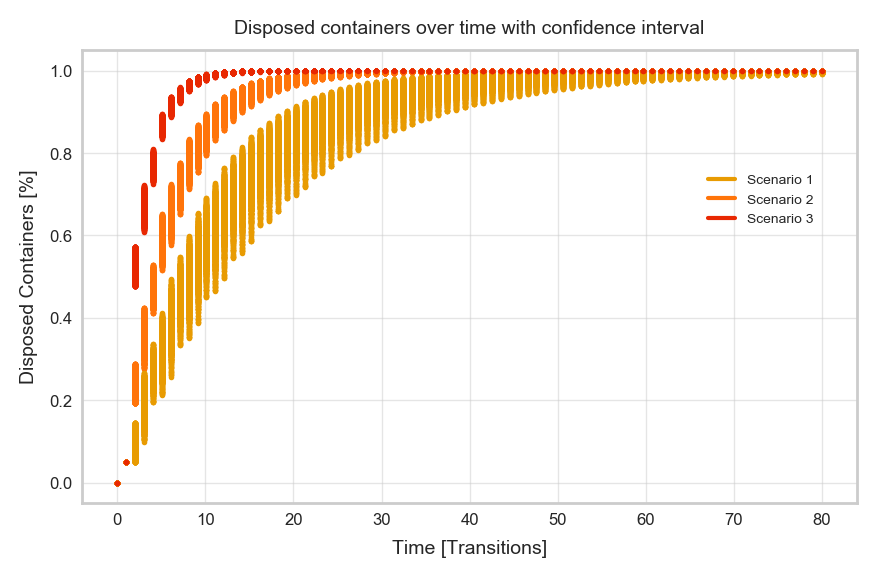

In [74]:
#Generates 1000 transistion matricies by sampling from a uniform distribution
#Iterates over the markov chain for each transition matrix with a nested for-loop
#Logs the distribution history of disposed containers for each transition matrix

simulations = 1000
transitions = 80

#SCENARIO 1
initialDistS1 = np.array([1.0, 0.0, 0.0, 0.0, 0.0])
disposedIterationsS1 = np.zeros(transitions)

for x in range (1,simulations):
    distHistoryS1 = initialDistS1
    currentDistS1 = initialDistS1
    bcS1 = np.random.uniform(0.9, 1.0, 1)
    caS1 = np.random.uniform(0.75, 0.85, 1)
    cdS1 = np.random.uniform(0.05, 0.15, 1)
    transMatrixS1 = np.array([[0.0, 0.95, 0.00, 0.05, 0.0], 
                            [0.0, 0.00, bcS1.item(0), 1 - bcS1.item(0), 0.0],
                            [caS1.item(0), 0.00, 0.00, cdS1.item(0), 1 - caS1.item(0) - cdS1.item(0)],
                            [0.0, 0.00, 0.00, 1.00, 0.0], 
                            [0.2, 0.00, 0.00, 0.50, 0.3]])
    
    for i in range (1,transitions):
        currentDistS1 = np.matmul(currentDistS1, transMatrixS1)
        distHistoryS1 = np.vstack([distHistoryS1, currentDistS1])
    
    disposedIterationsS1 = np.vstack([disposedIterationsS1, distHistoryS1[ : , 3]])
    
#SCENARIO 2
initialDistS2 = np.array([1.0, 0.0, 0.0, 0.0, 0.0])
disposedIterationsS2 = np.zeros(transitions)

for x in range (1,simulations):
    distHistoryS2 = initialDistS2
    currentDistS2 = initialDistS2
    bcS2 = np.random.uniform(0.75, 0.85, 1)
    caS2 = np.random.uniform(0.55, 0.65, 1)
    cdS2 = np.random.uniform(0.10, 0.20, 1)
    transMatrixS2 = np.array([[0.0, 0.95, 0.00, 0.05, 0.0], 
                            [0.0, 0.00, bcS2.item(0), 1 - bcS2.item(0), 0.0],
                            [caS2.item(0), 0.00, 0.00, cdS2.item(0), 1 - caS2.item(0) - cdS2.item(0)],
                            [0.0, 0.00, 0.00, 1.00, 0.0], 
                            [0.2, 0.00, 0.00, 0.50, 0.3]])
    
    for i in range (1,transitions):
        currentDistS2 = np.matmul(currentDistS2, transMatrixS2)
        distHistoryS2 = np.vstack([distHistoryS2, currentDistS2])
    
    disposedIterationsS2 = np.vstack([disposedIterationsS2, distHistoryS2[ : , 3]])
    

#SCENARIO 3
initialDistS3 = np.array([1.0, 0.0, 0.0, 0.0, 0.0])
disposedIterationsS3 = np.zeros(transitions)

for x in range (1,simulations):
    distHistoryS3 = initialDistS3
    currentDistS3 = initialDistS3
    bcS3 = np.random.uniform(0.45, 0.55, 1)
    caS3 = np.random.uniform(0.25, 0.35, 1)
    cdS3 = np.random.uniform(0.25, 0.35, 1)
    transMatrixS3 = np.array([[0.0, 0.95, 0.00, 0.05, 0.0], 
                            [0.0, 0.00, bcS3.item(0), 1 - bcS3.item(0), 0.0],
                            [caS3.item(0), 0.00, 0.00, cdS3.item(0), 1 - caS3.item(0) - cdS3.item(0)],
                            [0.0, 0.00, 0.00, 1.00, 0.0], 
                            [0.2, 0.00, 0.00, 0.50, 0.3]])
    
    for i in range (1,transitions):
        currentDistS3 = np.matmul(currentDistS3, transMatrixS3)
        distHistoryS3 = np.vstack([distHistoryS3, currentDistS3])
    
    disposedIterationsS3 = np.vstack([disposedIterationsS3, distHistoryS3[ : , 3]])
 
    
plt.figure(figsize = (5,3), dpi=200)    
plt.style.use('seaborn-whitegrid')    
x = np.linspace(0, transitions, transitions)
for ii in range (1,simulations):   
    yS1 = disposedIterationsS1[ii, : ]
    yS2 = disposedIterationsS2[ii, : ]
    yS3 = disposedIterationsS3[ii, : ]
    plt.plot(x, yS1, 'o', color='#E89B02', markersize = '1')    
    plt.plot(x, yS2, 'o', color='#FF740A', markersize = '1') 
    plt.plot(x, yS3, 'o', color='#E82802', markersize = '1') 

#Visuals
plt.plot(0, 0, label = 'Scenario 1', color = '#E89B02')    
plt.plot(0, 0, label = 'Scenario 2', color = '#FF740A')     
plt.plot(0, 0, label = 'Scenario 3', color = '#E82802') 
plt.legend(loc = (0.8, 0.6), fontsize = '5')

plt.title('Disposed containers over time with confidence interval', fontsize = '7')
plt.xlabel('Time [Transitions]', fontsize = '7')
plt.ylabel('Disposed Containers [%]', fontsize = '7')
plt.xticks(fontsize = '6')
plt.yticks(fontsize = '6')
plt.grid(zorder = 0, alpha = 0.5, linewidth = 0.5)

plt.show()

## Analysis/Result: Conversion to impact categories
### CO2 Emmissions Per Use Cycle

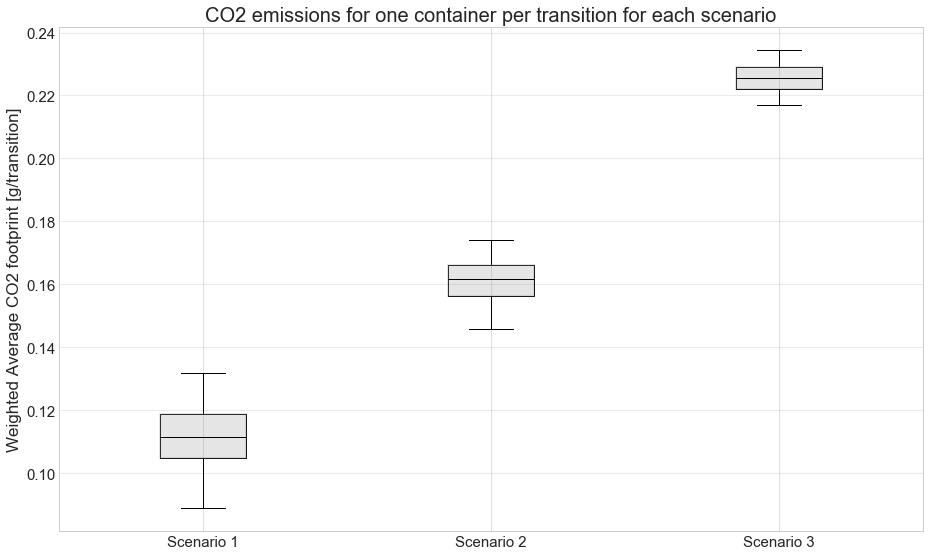

In [51]:
#SCENARIO 1

#Weighted average material consumption per use cycle (Boxplot)
priorS1 = 0.0
diffS1 = 0.0
sumS1 = np.array([0.0])
weightedAvgS1 = np.array([0.0])

for i in range (1,simulations):
    
    for j in range (1,transitions):
        priorS1 = disposedIterationsS1.item(i, j - 1)
        diffS1 = disposedIterationsS1.item(i, j) - priorS1
        co2S1 = ((co2Production + (co2Use * (j / 4.5))) / j) * diffS1
        sumS1[0] += co2S1
        
    weightedAvgS1 = np.hstack((weightedAvgS1, sumS1))
    sumS1.itemset(0, 0)
    
weightedAvgS1 = np.delete(weightedAvgS1, 0)

#SCENARIO 2   
priorS2 = 0.0
diffS2 = 0.0
sumS2 = np.array([0.0])
weightedAvgS2 = np.array([0.0])

for i in range (1,simulations):
    
    for j in range (1,transitions):
        priorS2 = disposedIterationsS2.item(i, j - 1)
        diffS2 = disposedIterationsS2.item(i, j) - priorS2
        co2S2 = ((co2Production + (co2Use * (j / 4.5))) / j) * diffS2
        sumS2[0] += co2S2
        
    weightedAvgS2 = np.hstack((weightedAvgS2, sumS2))
    sumS2.itemset(0, 0)
    
weightedAvgS2 = np.delete(weightedAvgS2, 0)
    
#SCENARIO 3
priorS3 = 0.0
diffS3 = 0.0
sumS3 = np.array([0.0])
weightedAvgS3 = np.array([0.0])

for i in range (1,simulations):
    
    for j in range (1,transitions):
        priorS3 = disposedIterationsS3.item(i, j - 1)
        diffS3 = disposedIterationsS3.item(i, j) - priorS3
        co2S3 = ((co2Production + (co2Use * (j / 4.5))) / j) * diffS3
        sumS3[0] += co2S3
        
    weightedAvgS3 = np.hstack((weightedAvgS3, sumS3))
    sumS3.itemset(0, 0)   
    
weightedAvgS3 = np.delete(weightedAvgS3, 0)


#PLOT
data = [weightedAvgS1, weightedAvgS2, weightedAvgS3]

fig = plt.figure(1, figsize=(12, 7))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(data)

bp = ax.boxplot(data, patch_artist = True)
for box in bp['boxes']:
    box.set( color='grey', linewidth=2)
    box.set(facecolor = 'grey', alpha = 0.2)
for median in bp['medians']:
    median.set(color='black', linewidth=1)

plt.title('CO2 emissions for one container per transition for each scenario', fontsize = '20')
ax.set_xticklabels(['Scenario 1', 'Scenario 2', 'Scenario 3'])
ax.set_ylabel('Weighted Average CO2 footprint [g/transition]', size = '17')
ax.tick_params(axis = 'both', labelsize = '15', grid_alpha = 0.5)
    
plt.show()

#https://matplotlib.org/api/axes_api.html?highlight=boxplot#matplotlib.axes.Axes.boxplot


plt.show()

### Total CO2 Emsission

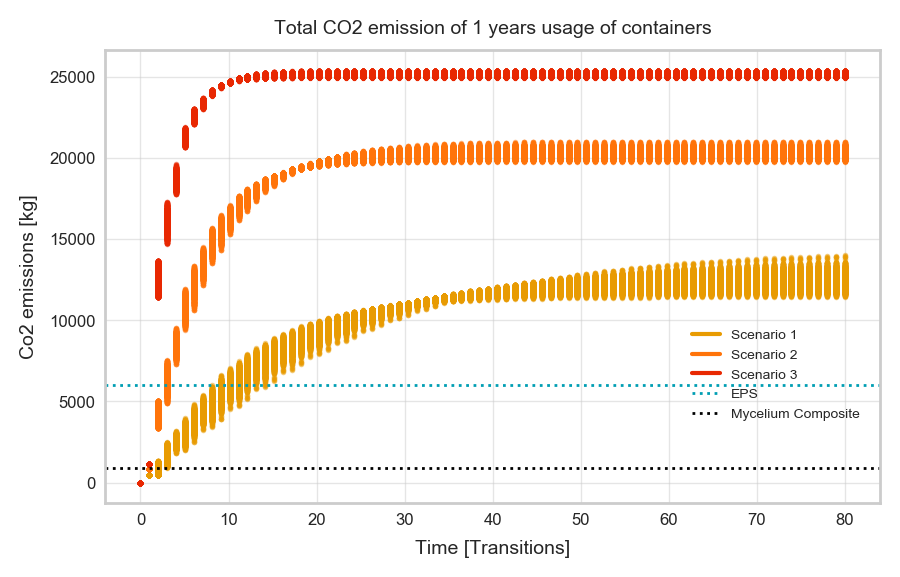

In [64]:
#Total amount of CO2 emissions

plt.figure(figsize = (5,3), dpi=200)    
plt.style.use('seaborn-whitegrid')    
x = np.linspace(0, transitions, transitions)

#SCENARIO 1
priorS1 = 0.0
diffS1 = 0.0
sumConsumptionS1 = np.array([0.0])
accumulatedCo2S1 = np.array([0.0])

for i in range (1,simulations):
    accumulatedCo2S1 = np.array([0.0])    
    for j in range (1,transitions):
        priorS1 = disposedIterationsS1.item(i, j - 1)
        diffS1 = disposedIterationsS1.item(i, j) - priorS1
        co2ConsumptionS1 = (co2Production + (co2Use * j)) * (containerAmountS1 * diffS1)
        sumConsumptionS1[0] += co2ConsumptionS1
        accumulatedCo2S1 = np.hstack((accumulatedCo2S1, sumConsumptionS1)) 
    plt.plot(x, accumulatedCo2S1, 'o', color='#E89B02', markersize = '1', alpha = 0.5)
    sumConsumptionS1.itemset(0, 0)

    
#SCENARIO 2
priorS2 = 0.0
diffS2 = 0.0
sumConsumptionS2 = np.array([0.0])
accumulatedCo2S2 = np.array([0.0])

for i in range (1,simulations):
    accumulatedCo2S2 = np.array([0.0])    
    for j in range (1,transitions):
        priorS2 = disposedIterationsS2.item(i, j - 1)
        diffS2 = disposedIterationsS2.item(i, j) - priorS2
        co2ConsumptionS2 = (co2Production + (co2Use * j)) * (containerAmountS2 * diffS2)
        sumConsumptionS2[0] += co2ConsumptionS2
        accumulatedCo2S2 = np.hstack((accumulatedCo2S2, sumConsumptionS2)) 
    plt.plot(x, accumulatedCo2S2, 'o', color='#FF740A', markersize = '1', alpha = 0.5)
    sumConsumptionS2.itemset(0, 0)

#SCENARIO 3
priorS3 = 0.0
diffS3 = 0.0
sumConsumptionS3 = np.array([0.0])
accumulatedCo2S3 = np.array([0.0])

for i in range (1,simulations):
    accumulatedCo2S3 = np.array([0])    
    for j in range (1,transitions):
        priorS3 = disposedIterationsS3.item(i, j - 1)
        diffS3 = disposedIterationsS3.item(i, j) - priorS3
        co2ConsumptionS3 = (co2Production + (co2Use * j)) * (containerAmountS3 * diffS3)
        sumConsumptionS3[0] += co2ConsumptionS3
        accumulatedCo2S3 = np.hstack((accumulatedCo2S3, sumConsumptionS3)) 
    plt.plot(x, accumulatedCo2S3, 'o', color='#E82802', markersize = '1', alpha = 0.5)
    sumConsumptionS3.itemset(0, 0)

plt.plot(0, 0, label = 'Scenario 1', color = '#E89B02')    
plt.plot(0, 0, label = 'Scenario 2', color = '#FF740A')     
plt.plot(0, 0, label = 'Scenario 3', color = '#E82802') 
plt.axhline(y = 5994, xmin = 0, xmax = 80, label = 'EPS', color = '#009EB3', linewidth = '1', linestyle = ':')
plt.axhline(y = 884, xmin = 0, xmax = 80, label = 'Mycelium Composite', color = 'black', linewidth = '1', linestyle = ':')
    
plt.title('Total CO2 emission of 1 years usage of containers', fontsize = '7')
plt.xlabel('Time [Transitions]', fontsize = '7')
plt.ylabel('Co2 emissions [kg]', fontsize = '7')
plt.xticks(fontsize = '6')
plt.yticks(fontsize = '6')
plt.ticklabel_format(axis = 'y', style = 'sci')
plt.legend(loc = (0.75, 0.17), fontsize = '5')
plt.grid(zorder = 0, alpha = 0.5, linewidth = 0.5)

plt.show()

### Energy Consumption Per Transition

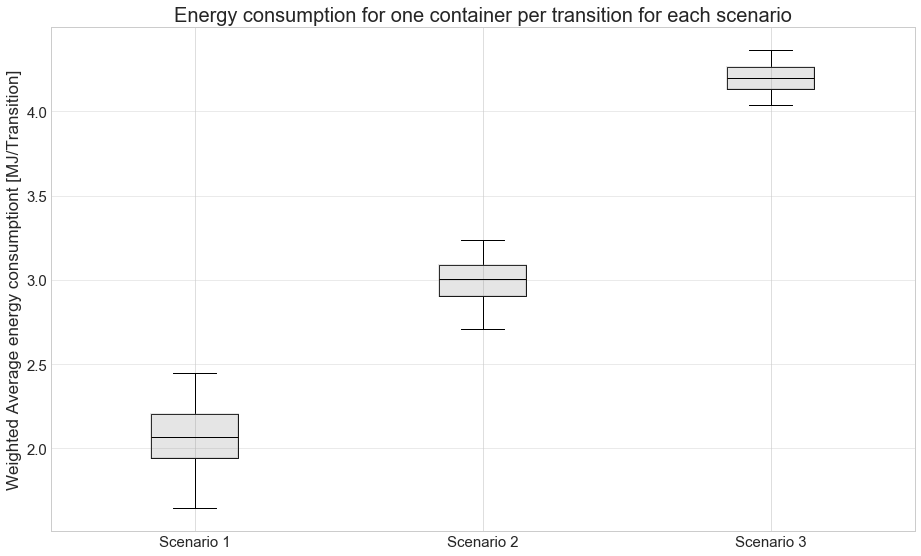

In [72]:
#SCENARIO 1

#Weighted average energy consumption per transition (Boxplot)
priorS1 = 0.0
diffS1 = 0.0
sumS1 = np.array([0.0])
weightedAvgS1 = np.array([0.0])

for i in range (1,simulations):
    
    for j in range (1,transitions):
        priorS1 = disposedIterationsS1.item(i, j - 1)
        diffS1 = disposedIterationsS1.item(i, j) - priorS1
        energyS1 = ((embodiedEnergy + (energyUse * (j / 4.5))) / j) * diffS1
        sumS1[0] += energyS1
        
    weightedAvgS1 = np.hstack((weightedAvgS1, sumS1))
    sumS1.itemset(0, 0)
    
weightedAvgS1 = np.delete(weightedAvgS1, 0)

#SCENARIO 2   
priorS2 = 0.0
diffS2 = 0.0
sumS2 = np.array([0.0])
weightedAvgS2 = np.array([0.0])

for i in range (1,simulations):
    
    for j in range (1,transitions):
        priorS2 = disposedIterationsS2.item(i, j - 1)
        diffS2 = disposedIterationsS2.item(i, j) - priorS2
        energyS2 = ((embodiedEnergy + (energyUse * (j/ 4.5))) / j) * diffS2
        sumS2[0] += energyS2
        
    weightedAvgS2 = np.hstack((weightedAvgS2, sumS2))
    sumS2.itemset(0, 0)
    
weightedAvgS2 = np.delete(weightedAvgS2, 0)
    
#SCENARIO 3
priorS3 = 0.0
diffS3 = 0.0
sumS3 = np.array([0.0])
weightedAvgS3 = np.array([0.0])

for i in range (1,simulations):
    
    for j in range (1,transitions):
        priorS3 = disposedIterationsS3.item(i, j - 1)
        diffS3 = disposedIterationsS3.item(i, j) - priorS3
        energyS3 = ((embodiedEnergy + (energyUse * (j / 4.5))) / j) * diffS3
        sumS3[0] += energyS3
        
    weightedAvgS3 = np.hstack((weightedAvgS3, sumS3))
    sumS3.itemset(0, 0)   
    
weightedAvgS3 = np.delete(weightedAvgS3, 0)


#PLOT
data = [weightedAvgS1, weightedAvgS2, weightedAvgS3]

fig = plt.figure(1, figsize=(12, 7))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(data)

bp = ax.boxplot(data, patch_artist = True)
for box in bp['boxes']:
    box.set( color='grey', linewidth=2)
    box.set(facecolor = 'grey', alpha = 0.2)
for median in bp['medians']:
    median.set(color='black', linewidth=1)

plt.title('Energy consumption for one container per transition for each scenario', fontsize = '20')
ax.set_xticklabels(['Scenario 1', 'Scenario 2', 'Scenario 3'], size = '17')
ax.set_ylabel('Weighted Average energy consumptiont [MJ/Transition]', size = '17')
ax.tick_params(axis = 'both', labelsize = '15', grid_alpha = 0.5)
    
plt.show()

### Total Energy Consumption

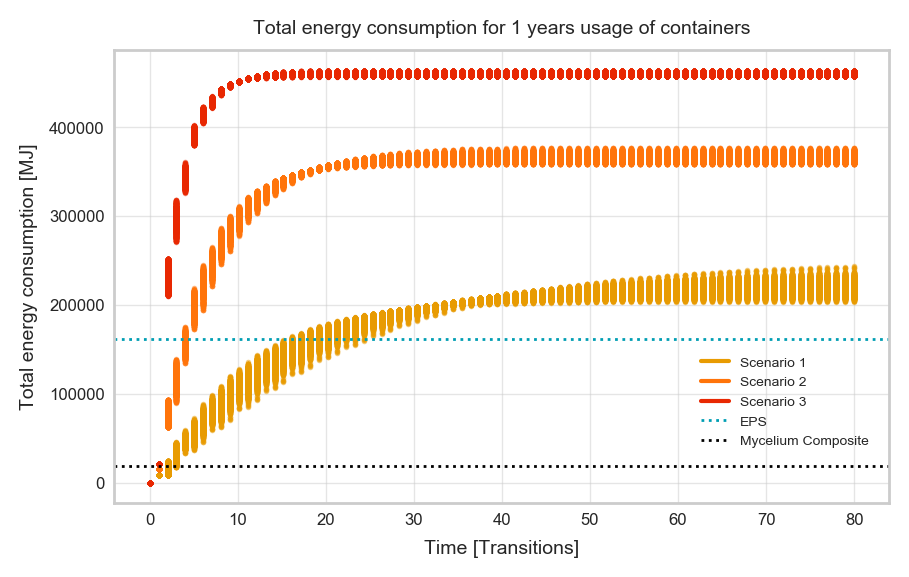

In [68]:
#Total amount of energy consumption

plt.figure(figsize = (5,3), dpi=200)    
plt.style.use('seaborn-whitegrid')    
x = np.linspace(0, transitions, transitions)

#SCENARIO 1
priorS1 = 0.0
diffS1 = 0.0
sumConsumptionS1 = np.array([0.0])
accumulatedEnergyS1 = np.array([0.0])

for i in range (1,simulations):
    accumulatedEnergyS1 = np.array([0.0])    
    for j in range (1,transitions):
        priorS1 = disposedIterationsS1.item(i, j - 1)
        diffS1 = disposedIterationsS1.item(i, j) - priorS1
        energyConsumptionS1 = (embodiedEnergy + (energyUse * j)) * (containerAmountS1 * diffS1)
        sumConsumptionS1[0] += energyConsumptionS1
        accumulatedEnergyS1 = np.hstack((accumulatedEnergyS1, sumConsumptionS1)) 
    plt.plot(x, accumulatedEnergyS1, 'o', color='#E89B02', markersize = '1', alpha = 0.5)
    sumConsumptionS1.itemset(0, 0)

    
#SCENARIO 2
priorS2 = 0.0
diffS2 = 0.0
sumConsumptionS2 = np.array([0.0])
accumulatedEnergyS2 = np.array([0.0])

for i in range (1,simulations):
    accumulatedEnergyS2 = np.array([0.0])    
    for j in range (1,transitions):
        priorS2 = disposedIterationsS2.item(i, j - 1)
        diffS2 = disposedIterationsS2.item(i, j) - priorS2
        energyConsumptionS2 = (embodiedEnergy + (energyUse * j)) * (containerAmountS2 * diffS2)
        sumConsumptionS2[0] += energyConsumptionS2
        accumulatedEnergyS2 = np.hstack((accumulatedEnergyS2, sumConsumptionS2)) 
    plt.plot(x, accumulatedEnergyS2, 'o', color='#FF740A', markersize = '1', alpha = 0.5)
    sumConsumptionS2.itemset(0, 0)

#SCENARIO 3
priorS3 = 0.0
diffS3 = 0.0
sumConsumptionS3 = np.array([0.0])
accumulatedEnergyS3 = np.array([0.0])

for i in range (1,simulations):
    accumulatedEnergyS3 = np.array([0])    
    for j in range (1,transitions):
        priorS3 = disposedIterationsS3.item(i, j - 1)
        diffS3 = disposedIterationsS3.item(i, j) - priorS3
        energyConsumptionS3 = (embodiedEnergy + (energyUse * j)) * (containerAmountS3 * diffS3)
        sumConsumptionS3[0] += energyConsumptionS3
        accumulatedEnergyS3 = np.hstack((accumulatedEnergyS3, sumConsumptionS3)) 
    plt.plot(x, accumulatedEnergyS3, 'o', color='#E82802', markersize = '1', alpha = 0.5)
    sumConsumptionS3.itemset(0, 0)


plt.plot(0, 0, label = 'Scenario 1', color = '#E89B02')    
plt.plot(0, 0, label = 'Scenario 2', color = '#FF740A')     
plt.plot(0, 0, label = 'Scenario 3', color = '#E82802') 
plt.axhline(y = 161024, xmin = 0, xmax = 80, label = 'EPS', color = '#009EB3', linewidth = '1', linestyle = ':')
plt.axhline(y = 19108, xmin = 0, xmax = 80, label = 'Mycelium Composite', color = 'black', linewidth = '1', linestyle = ':')


plt.title('Total energy consumption for 1 years usage of containers', fontsize = '7')
plt.xlabel('Time [Transitions]', fontsize = '7')
plt.ylabel('Total energy consumption [MJ]', fontsize = '7')
plt.xticks(fontsize = '6')
plt.yticks(fontsize = '6')
plt.legend(loc = (0.75, 0.11), fontsize = '5')
plt.ticklabel_format(axis = 'y', style = 'sci')
plt.grid(zorder = 0, alpha = 0.5, linewidth = 0.5)

plt.show()